In [14]:
import pandas as pd
import numpy as np
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import f1_score, confusion_matrix, classification_report 
from sklearn.model_selection import learning_curve 

# 1.Import images

In [15]:
filename = 'Dataset.txt'
data = np.loadtxt(filename, delimiter=',', skiprows=1, dtype=str)
print(data)

[['0.058824' '0.12255' '0' ... '0.5307' '0' 'AiinI']
 ['0.021531' '0.062201' '0' ... '0.52366' '0' 'AiinI']
 ['0' '0.046154' '0.076923' ... '0.5173' '0' 'AiinI']
 ...
 ['0' '0' '0.038889' ... '0.52376' '0' 'ZadI']
 ['0' '0.052941' '0' ... '0.55084' '0' 'ZadI']
 ['0' '0' '0' ... '0.52537' '0' 'ZadI']]


# 2.Preprocessing

#Save images into array

In [16]:
x=data[:,:-1]
y=data[:,-1]

In [17]:
z=np.array(x)
Y=np.array(y)

# 3.Split dataset

In [18]:
# In the first step we will split the data in training and remaining set
X_train, X_rem, y_train, y_rem = train_test_split(x,Y, train_size=0.3)

In [19]:
X_pool, X_test, y_pool, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [20]:
print(X_train.shape), print(y_train.shape)
print(X_pool.shape), print(y_pool.shape)
print(X_test.shape), print(y_test.shape)

(1679, 31)
(1679,)
(1960, 31)
(1960,)
(1960, 31)
(1960,)


(None, None)

# 4.Build and train the learner

In [21]:
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_train, y_training=y_train
)

#defining a function for evaluating the model

In [23]:
def evaluation(model):
    model.fit(X_train,y_train)
    ypred= model.predict(X_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    print(ypred)

In [24]:
evaluation(learner)

[[69  0  0  0  0  0  0  0  0  0  0  9  0  2  0  1  0  0  0  0  0  1  0  0
   0  0  0  0]
 [ 0 77  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0 81  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  2  0]
 [ 0  0  0 54  3  0  1  0  1  0  0  0  0  0  0  0  0  1  0  0  1  0  2  0
   0  0  0  0]
 [ 0  0  0  2 69  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0 55  0  0  0  0  0  0  0  0  0  2  0  0  4  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  2  0 65  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0]
 [ 0  0  0  0  0  0  0 73  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  1]
 [ 0  0  0  3  0  0  1  0 64  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 50  0  0  0  0 11  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 66  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 4  0  0  0  0  0  

In [25]:
model_accuracy = 0.95
n=1
performance_history = []

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
while model_accuracy<=0.98:
    n=n+1
    query_index, query_instance = learner.query(X_pool)

  # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X, y=y)

  # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

  # Calculate and report our model's accuracy.
    model_accuracy = learner.score(z,Y)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=n+1, acc=model_accuracy))

  # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 3: 0.9630
Accuracy after query 4: 0.9650
Accuracy after query 5: 0.9648
Accuracy after query 6: 0.9641
Accuracy after query 7: 0.9648
Accuracy after query 8: 0.9654
Accuracy after query 9: 0.9657
Accuracy after query 10: 0.9646
Accuracy after query 11: 0.9662
Accuracy after query 12: 0.9645
Accuracy after query 13: 0.9655
Accuracy after query 14: 0.9643
Accuracy after query 15: 0.9657
Accuracy after query 16: 0.9648
Accuracy after query 17: 0.9664
Accuracy after query 18: 0.9671
Accuracy after query 19: 0.9666
Accuracy after query 20: 0.9679
Accuracy after query 21: 0.9662
Accuracy after query 22: 0.9654
Accuracy after query 23: 0.9668
Accuracy after query 24: 0.9677
Accuracy after query 25: 0.9657
Accuracy after query 26: 0.9677
Accuracy after query 27: 0.9664
Accuracy after query 28: 0.9664
Accuracy after query 29: 0.9680
Accuracy after query 30: 0.9666
Accuracy after query 31: 0.9639
Accuracy after query 32: 0.9691
Accuracy after query 33: 0.9670
Accuracy after 

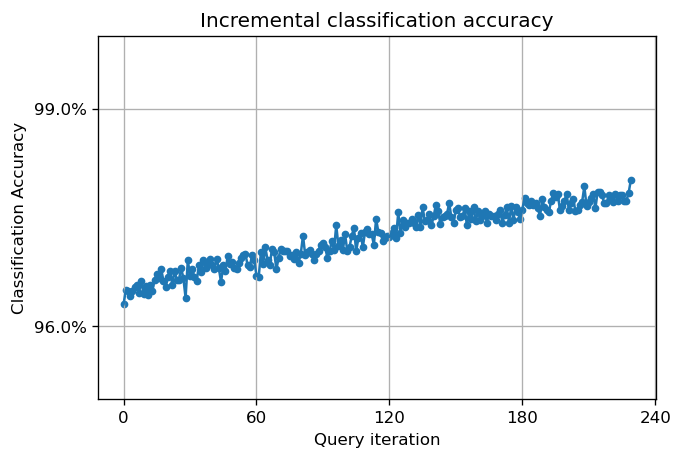

In [26]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=2))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0.95,top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
plt.savefig("accuracy.png")
plt.show()

In [28]:
print('Classification accuracy after {n} queries: {final_acc:.3f}'.format(n=n, final_acc=performance_history[-1]))


Classification accuracy after 231 queries: 0.980
